In [51]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')
    
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

In [52]:
df = pd.read_excel("data.xlsx", sheet_name="Sheet1")

df = df.iloc[:, [0, 2, 3, 4, 5]]
df.columns = ['date', 'close', 'high', 'low', 'volume']

df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2025-03-30')]
df

,date,close,high,low,volume
0,2021-01-04,28.114,28.794,27.754,2286144
1,2021-01-05,29.214,29.814,28.594,3579447
2,2021-01-06,31.274,31.714,30.744,4041173
3,2021-01-07,31.924,32.044,31.174,2649081
4,2021-01-08,31.634,31.824,31.184,1893021
...,...,...,...,...,...
1059,2025-03-24,62.119,62.369,61.839,1813892
1060,2025-03-25,63.520,64.060,63.120,2034398
1061,2025-03-26,64.870,65.620,64.770,2997837
1062,2025-03-27,65.180,65.760,64.940,1651528


In [53]:
df['label'] = df.close.shift(-1) - df.close
df.label = df.label.apply(lambda x: 0 if x < 0 else 1)
df.head()

,date,close,high,low,volume,label
0,2021-01-04,28.114,28.794,27.754,2286144,1
1,2021-01-05,29.214,29.814,28.594,3579447,1
2,2021-01-06,31.274,31.714,30.744,4041173,1
3,2021-01-07,31.924,32.044,31.174,2649081,0
4,2021-01-08,31.634,31.824,31.184,1893021,0


In [54]:
import ta

# Momentum indicators
df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
df['tsi'] = ta.momentum.tsi(close=df.close) # True strength index (TSI)

# Volatility indicators
bb_indicator = ta.volatility.BollingerBands(close=df.close)
df['bb_bbhi'] = bb_indicator.bollinger_hband_indicator() # Bollinger Band high indicator
df['bb_bbli'] = bb_indicator.bollinger_lband_indicator() # Bollinger Band low indicator

# Trend indicators
#aroon_indicator = ta.trend.AroonIndicator(close=df.close)
aroon_indicator = ta.trend.AroonIndicator(df['high'], df['low'])
macd_indicator = ta.trend.MACD(close=df.close)
kst_indicator = ta.trend.KSTIndicator(close=df.close)
df['aroon_down'] = aroon_indicator.aroon_down() # Aroon Down Channel
df['aroon'] = aroon_indicator.aroon_indicator() # Aroon Indicator
df['aroon_up'] = aroon_indicator.aroon_up() # Aroon Up Channel
df['macd_line'] = macd_indicator.macd() # MACD Line
df['macd_hist'] = macd_indicator.macd_diff() # MACD Histogram
df['macd_signal'] = macd_indicator.macd_signal() # MACD Signal Line
df['kst'] = kst_indicator.kst() # Know Sure Thing (KST)
df['kst_diff'] = kst_indicator.kst_diff() # Diff Know Sure Thing (KST)
df['kst_signal'] = kst_indicator.kst_sig() # Signal Line Know Sure Thing (KST)
df['dpo'] = ta.trend.dpo(close=df.close) # Detrended Price Oscillator (DPO)
df['trix'] = ta.trend.trix(close=df.close) # Trix (TRIX)
df['sma_10'] = ta.trend.sma_indicator(close=df.close, window=10) # SMA n=10
df['sma_20'] = ta.trend.sma_indicator(close=df.close, window=20) # SMA n=20
df['sma_30'] = ta.trend.sma_indicator(close=df.close, window=30) # SMA n=30
df['sma_60'] = ta.trend.sma_indicator(close=df.close, window=60) # SMA n=60
df['ema_10'] = ta.trend.ema_indicator(close=df.close, window=10) # EMA n=10
df['ema_20'] = ta.trend.ema_indicator(close=df.close, window=20) # EMA n=20
df['ema_30'] = ta.trend.ema_indicator(close=df.close, window=30) # EMA n=30
df['ema_60'] = ta.trend.ema_indicator(close=df.close, window=60) # EMA n=60

# Volume indicators
df['obv'] = ta.volume.on_balance_volume(close=df.close, volume=df.volume) # On Balance Volume (OBV)
df['vpt'] = ta.volume.volume_price_trend(close=df.close, volume=df.volume) # Volume-price trend (VPT)
df['fi'] = ta.volume.force_index(close=df.close, volume=df.volume) # Force Index (FI)
df['nvi'] = ta.volume.negative_volume_index(close=df.close, volume=df.volume) # Negative Volume Index (NVI)

df.tail()

,date,close,high,low,volume,label,roc,rsi,tsi,bb_bbhi,...,sma_30,sma_60,ema_10,ema_20,ema_30,ema_60,obv,vpt,fi,nvi
1059,2025-03-24,62.119,62.369,61.839,1813892,1,3.619743,60.979092,30.759386,0.0,...,60.627333,58.606867,62.001864,61.236960,60.635353,59.677747,129572647,859997.710099,84208.156330,3653.582288
1060,2025-03-25,63.520,64.060,63.120,2034398,1,4.889447,68.369587,31.873793,0.0,...,60.760700,58.787583,62.277888,61.454393,60.821460,59.803723,131607045,905880.477014,479348.647997,3653.582288
1061,2025-03-26,64.870,65.620,64.770,2997837,1,7.687711,73.565157,34.805255,1.0,...,60.917400,58.989800,62.749181,61.779688,61.082656,59.969830,134604882,969593.952298,989024.548283,3653.582288
1062,2025-03-27,65.180,65.760,64.940,1651528,0,7.417723,74.597028,37.419742,1.0,...,61.089100,59.194850,63.191148,62.103528,61.347001,60.140655,136256410,977486.255057,920874.424243,3671.041985
1063,2025-03-28,64.150,64.560,63.920,1421243,1,5.685431,65.454830,36.313586,0.0,...,61.219800,59.383400,63.365485,62.298430,61.527839,60.272109,134835167,955027.214094,580195.179351,3613.030735


In [55]:
df = df.set_index('date')
df['datetime'] = pd.to_datetime(df.index)
df['min_sin'] = np.sin(2 * np.pi * df.datetime.dt.minute / 60)
df['min_cos'] = np.cos(2 * np.pi * df.datetime.dt.minute / 60)
df['hour_sin'] = np.sin(2 * np.pi * df.datetime.dt.hour / 60)
df['hour_cos'] = np.cos(2 * np.pi * df.datetime.dt.hour / 60)
df['day_sin'] = np.sin(2 * np.pi * df.datetime.dt.day / 30)
df['day_cos'] = np.cos(2 * np.pi * df.datetime.dt.day / 30)
df['month_sin'] = np.sin(2 * np.pi * df.datetime.dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df.datetime.dt.month / 12)

df = df.drop(['datetime'], axis=1)
df = df.drop(['high'], axis=1)
df = df.drop(['low'], axis=1)
print(df.shape)
df.tail()

(1064, 39)


,close,volume,label,roc,rsi,tsi,bb_bbhi,bb_bbli,aroon_down,aroon,...,fi,nvi,min_sin,min_cos,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2025-03-24,62.119,1813892,1,3.619743,60.979092,30.759386,0.0,0.0,44.0,44.0,...,84208.156330,3653.582288,0.0,1.0,0.0,1.0,-0.951057,0.309017,1.0,6.123234e-17
2025-03-25,63.520,2034398,1,4.889447,68.369587,31.873793,0.0,0.0,40.0,60.0,...,479348.647997,3653.582288,0.0,1.0,0.0,1.0,-0.866025,0.500000,1.0,6.123234e-17
2025-03-26,64.870,2997837,1,7.687711,73.565157,34.805255,1.0,0.0,36.0,64.0,...,989024.548283,3653.582288,0.0,1.0,0.0,1.0,-0.743145,0.669131,1.0,6.123234e-17
2025-03-27,65.180,1651528,0,7.417723,74.597028,37.419742,1.0,0.0,32.0,68.0,...,920874.424243,3671.041985,0.0,1.0,0.0,1.0,-0.587785,0.809017,1.0,6.123234e-17
2025-03-28,64.150,1421243,1,5.685431,65.454830,36.313586,0.0,0.0,28.0,68.0,...,580195.179351,3613.030735,0.0,1.0,0.0,1.0,-0.406737,0.913545,1.0,6.123234e-17


In [56]:
df_na = df.dropna(axis=0)
print(df_na.shape)
df_na.head()

(1005, 39)


,close,volume,label,roc,rsi,tsi,bb_bbhi,bb_bbli,aroon_down,aroon,...,fi,nvi,min_sin,min_cos,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2021-03-30,33.587,1224895,0,-6.687226,53.240035,9.744409,0.0,0.0,88.0,-36.0,...,-152609.192166,1177.740180,0.0,1.0,0.0,1.0,-1.133108e-15,1.000000,1.000000,6.123234e-17
2021-03-31,33.047,2247170,0,-5.509807,50.222224,8.543843,0.0,0.0,84.0,-36.0,...,-304160.993285,1177.740180,0.0,1.0,0.0,1.0,2.079117e-01,0.978148,1.000000,6.123234e-17
2021-04-01,32.887,2402593,0,-4.325944,49.329996,7.304219,0.0,0.0,80.0,-36.0,...,-315625.834245,1177.740180,0.0,1.0,0.0,1.0,2.079117e-01,0.978148,0.866025,-5.000000e-01
2021-04-05,32.537,1523123,0,-6.136049,47.348388,5.703839,0.0,0.0,76.0,-36.0,...,-346692.579353,1165.206076,0.0,1.0,0.0,1.0,8.660254e-01,0.500000,0.866025,-5.000000e-01
2021-04-06,32.527,2267822,1,-1.355614,47.289937,4.363118,0.0,0.0,72.0,-36.0,...,-300404.813731,1165.206076,0.0,1.0,0.0,1.0,9.510565e-01,0.309017,0.866025,-5.000000e-01


In [57]:
df_na.columns

Index(['close', 'volume', 'label', 'roc', 'rsi', 'tsi', 'bb_bbhi', 'bb_bbli',
       'aroon_down', 'aroon', 'aroon_up', 'macd_line', 'macd_hist',
       'macd_signal', 'kst', 'kst_diff', 'kst_signal', 'dpo', 'trix', 'sma_10',
       'sma_20', 'sma_30', 'sma_60', 'ema_10', 'ema_20', 'ema_30', 'ema_60',
       'obv', 'vpt', 'fi', 'nvi', 'min_sin', 'min_cos', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [58]:
df.to_excel("processed_data.xlsx", index=False)

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_na)

test_size = 60
train = scaled_data[:-test_size]
test = scaled_data[-test_size:]

ytrain = train[:, 0]
ytest = test[:, 0]
Xtrain = train[:, 1:]
Xtest = test[:, 1:]


In [61]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from datetime import timedelta
from tqdm import tqdm

def create_sequences(X, Y, seq_length):
    xs, ys = [], []
    for i in range(len(X) - seq_length):
        xs.append(X[i:i + seq_length])
        ys.append(Y[i + seq_length])
    return np.array(xs), np.array(ys)

seq_length = 10
X_train, y_train = create_sequences(Xtrain, ytrain, seq_length)
X_test, y_test = create_sequences(Xtest, ytest, seq_length)

In [62]:
# 位置编码层
class PositionalEncoding(layers.Layer):
    def call(self, x):
        seq_len = tf.shape(x)[1]
        d_model = tf.shape(x)[2]
        pos = tf.cast(tf.range(seq_len)[:, tf.newaxis], tf.float32)
        i = tf.cast(tf.range(d_model)[tf.newaxis, :], tf.float32)
        angle_rates = 1 / tf.pow(10000.0, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        angle_rads = pos * angle_rates
        sines = tf.sin(angle_rads[:, 0::2])
        cosines = tf.cos(angle_rads[:, 1::2])
        pos_encoding = tf.concat([sines, cosines], axis=-1)[tf.newaxis, ...]
        return x + pos_encoding

class AttentionBlock(layers.Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.norm = layers.LayerNormalization()
        self.dropout = layers.Dropout(0.1)
    def call(self, x):
        attn_out = self.attn(query=x, value=x, key=x)
        return self.norm(x + self.dropout(attn_out))

In [63]:
def build_model(seq_len, feature_dim):
    inputs = layers.Input(shape=(seq_len, feature_dim))
    x = PositionalEncoding()(inputs)
    for _ in range(2):
        x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
        x = AttentionBlock(d_model=64, num_heads=4)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(1)(x)
    model = models.Model(inputs=inputs, outputs=x)
    model.compile(optimizer='adam', loss='mse')
    return model


In [64]:
def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

In [65]:
def forecast():
    model = build_model(seq_len=seq_length, feature_dim=X_train.shape[2])
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    y_pred = model.predict(X_test)
    close_scaler = MinMaxScaler()
    close_scaler.min_, close_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
    y_pred_inv = close_scaler.inverse_transform(y_pred)
    return anchor(y_pred_inv.flatten(), 0.3)

Simulating:   0%|          | 0/10 [00:00<?, ?it/s]

2/2 [==============================] - 0s 6ms/step


Simulating:  10%|█         | 1/10 [00:26<04:02, 26.97s/it]

2/2 [==============================] - 0s 6ms/step


Simulating:  20%|██        | 2/10 [00:55<03:41, 27.64s/it]

2/2 [==============================] - 0s 5ms/step


Simulating:  30%|███       | 3/10 [01:26<03:24, 29.19s/it]

2/2 [==============================] - 0s 7ms/step


Simulating:  40%|████      | 4/10 [01:57<03:01, 30.17s/it]

2/2 [==============================] - 0s 6ms/step


Simulating:  50%|█████     | 5/10 [02:31<02:37, 31.55s/it]

2/2 [==============================] - 0s 5ms/step


Simulating:  60%|██████    | 6/10 [03:04<02:07, 31.80s/it]

2/2 [==============================] - 0s 5ms/step


Simulating:  70%|███████   | 7/10 [03:36<01:36, 32.03s/it]

2/2 [==============================] - 0s 6ms/step


Simulating:  80%|████████  | 8/10 [04:09<01:04, 32.23s/it]

2/2 [==============================] - 0s 6ms/step


Simulating:  90%|█████████ | 9/10 [04:44<00:33, 33.09s/it]

2/2 [==============================] - 0s 6ms/step


Simulating: 100%|██████████| 10/10 [05:16<00:00, 31.68s/it]


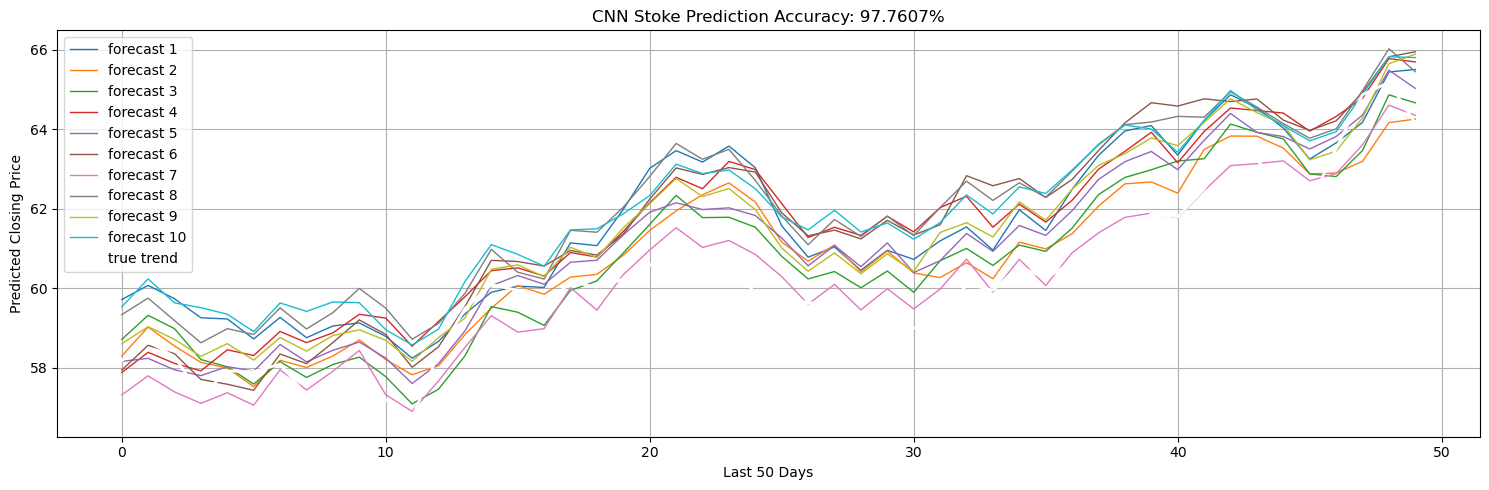

In [67]:
simulation_size = 10
results = []
for i in tqdm(range(simulation_size), desc="Simulating"):
    results.append(forecast())


true_close = df['close'].values[-test_size + seq_length:]
accuracies = [calculate_accuracy(true_close, r) for r in results]

plt.figure(figsize=(15, 5))
for i, r in enumerate(results):
    plt.plot(r, label=f'forecast {i + 1}', linewidth=1)
plt.plot(true_close, label='true trend', c='white', linewidth=2)
plt.xlabel('Last 50 Days')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.title("CNN Stoke Prediction Accuracy: %.4f%%" % np.mean(accuracies))
plt.grid(True)
plt.tight_layout()
plt.show()
